## Section 1: Exploritary Data Analysis (EDA)

In [3]:
import pandas as pd 
import missingno as msno

df = pd.read_csv('Customers.csv')

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [35]:
# Let us quickly look at the data and how the features are spread out.
df.drop('CustomerID', axis=1).describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


There is this tool called jupyter-summarytools that can help us look at the data even better

In [41]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CustomerID[int64],Mean (sd) : 1000.5 (577.5)min < med < max:1.0 < 1000.5 < 2000.0IQR (CV) : 999.5 (1.7),"2,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Gender[object],1. Female2. Male,"1,186 (59.3%)814 (40.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABM0lEQVR4nO3bwWnDQBRF0T9BmHgzgxC4GBWRYlPEdCOEZhEbbyaL9PA+5N1Twbe5CGz0ypwzAIUSEfeIuGUfYuQ953xmH5Fh2bbtq9a6Zh/iYoxxllK+HYNbaq3rvu/P1tor+5j/7rquz977ehzHLSL8YouIaK29Ho/HT/YxJu7ZB2T5yD4APogNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJBZIv5e6ss+xIH797yMMc7e+xrGL/UpjTHOiHhn35GBwYue7eClMOWDivuTzfYpk8F6yuc8q8tgO+Vzn9VlcJ/y8QtciD91IUNskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOM7ZTP8TNns57yOc/qMjB4YX8g8wsKW2rfwuH0SAAAAABJRU5ErkJggg=="">",0(0.0%)
3,Age[int64],Mean (sd) : 49.0 (28.4)min < med < max:0.0 < 48.0 < 99.0IQR (CV) : 48.0 (1.7),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsUlEQVR4nO3dv26bUBiG8e/U+YOTFGSlcjZuoFKHjCy9g15s124ZnBvIHWSxIkUEyzTIxHGXLpVa23CwOS99fjs2oEdw+LBkt9lsDAjdh753ANjHSd87cCjOubGZnXl8xGqz2bx2tT/wM8hQnXPj6+vrb3EcT9p+xmKxyJ1z34k1DIMM1czO4jieZFn2miRJ1XTjoiii2Ww2eX5+PjMzQg3AUEM1M7MkSarpdPqz5ebjTncGXniYggRChQRChQRChQRChYSgn/o9hvbx+/v7adf7cwy8qPi7YEP1GdrXdR2t1+vPVVXdmVnb8dTR8aLi34IN1TyG9o+Pj5OHh4eLt7e30aF2bhufO8HV1dU0y7IFLyr+FHKoZtZuaJ/neW/D+i7uBOfn53d9vKgIedlx0FA9D7zXdeZ6vT41s9g513TT1lfFPu8EXSw7Xl5els65H2bW+G5gOyI/WKi+B97nOrMsy9O6rr+kaToajUaNTrrPVbHPO4F5/j5iPp9/vL+//5qm6aem58xs99r6kFdUrwPv8+qyWq1Ooii6uL29rW5ubvIm2/a9PvbV9vcReZ6P256zfdbWO0P1HRElSZK3PfAW39mpy8tLqfVxCNqcs9+2nretof6PIyKEadcVVXZEhGHZa42qNiLC8PCuHxKCH/ijGZ/5b8i/jyDUAeli/hvqwy+hDsiQ57+EOkBDnP/yMAUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJe/3FZFEUUdMPXi6XkZlZWZbR09PTxTG3V/1u1f323X6fvn4B+laJNtT6K9AAAAAASUVORK5CYII="">",0(0.0%)
4,Annual Income ($)[int64],Mean (sd) : 110731.8 (45739.5)min < med < max:0.0 < 110045.0 < 189974.0IQR (CV) : 74520.8 (2.4),"1,786 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACwElEQVR4nO3dMY7aQBiG4W/CsphdYgsRsR0XiJSCkiY3yGHTptsCLsANaBASMiDIIlhwqhSRkoDH9jK/9336ARevhrE9xi7LMgGh+3DrAwCucXfrAwiVc64t6d5z+CHLspcyj+e9I9S/cM61e73etziOuz7jN5tN6pz7TqzlqW2oBWfEuNPp9Eej0SZJkn2egev1OhqPx93lcnkviVBLUstQi86Ix+MxOp1On1ut1nO/3//p8RFtn+/Fv9UyVEn3cRx3R6PRS94ZUZJms1l3Op0+vL6+Nqo4OORX11AlSUmS7H1mxDRNmREDw+UpmECoMIFQYQKhwoRan0y9R3W9o0aoNVLnO2qEWi/e149Dv6NGqBU4nU5NSbFzzmd44Z9f3+vHCviOGqGWbLfbNY/H45fBYNBoNBq574qtVqutc+6HpNxjJcXn87npMa4UVa6PCbVkh8PhLoqih+FwuH96ekrzjJ3P5x8nk8nXwWDwySfy33sU9vv9sySfGdVb1etjQq3I4+Nj7p/fNE3bvpFLN9+jUOn6mFAD5BO5VHyPQsG1dXw+n5tJkqRVrI8JFZKKr62rXnYQKiQVW1tL1S87CBV/uNWy4x

This is an amazing Data exploration GUI library. 

In [42]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Analyzing Missing Values

We see that all columns are complete except the profession column. 

<Axes: >

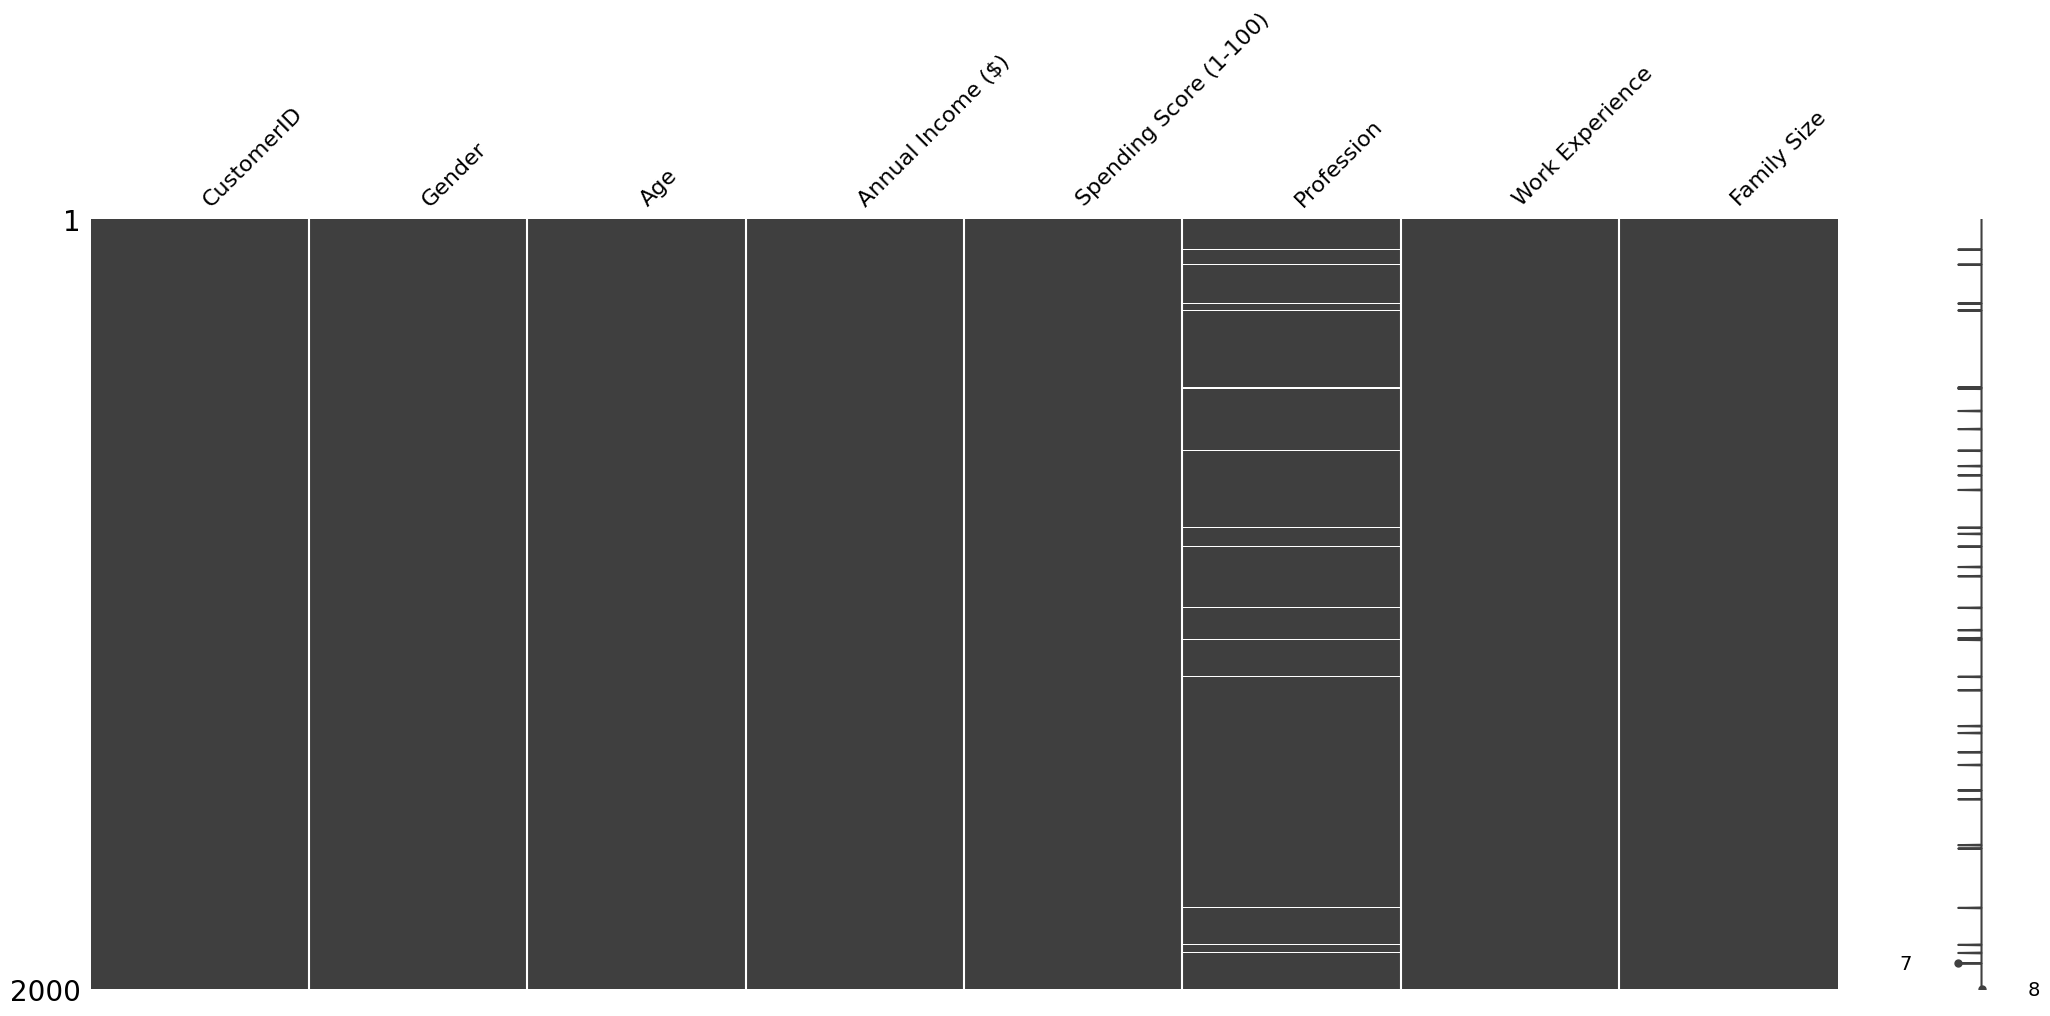

In [36]:
%matplotlib inline
msno.matrix(df)
# msno.dendrogram(df) -- This shows correlations between missing variables. Not too applicable to our dataset due to the size of it.

In [27]:
# Let us now remove those missing values from the dataset. I won't be imposing them due to the low amount. 
# So let's just get rid of samples in the dataset where the proferssion is not specified. 
df_cleaned = df.dropna()

One of my favroite data pre-processing, cleaning, etc. packages is klib

https://github.com/akanz1/klib?tab=readme-ov-file

GridSpec(6, 2)

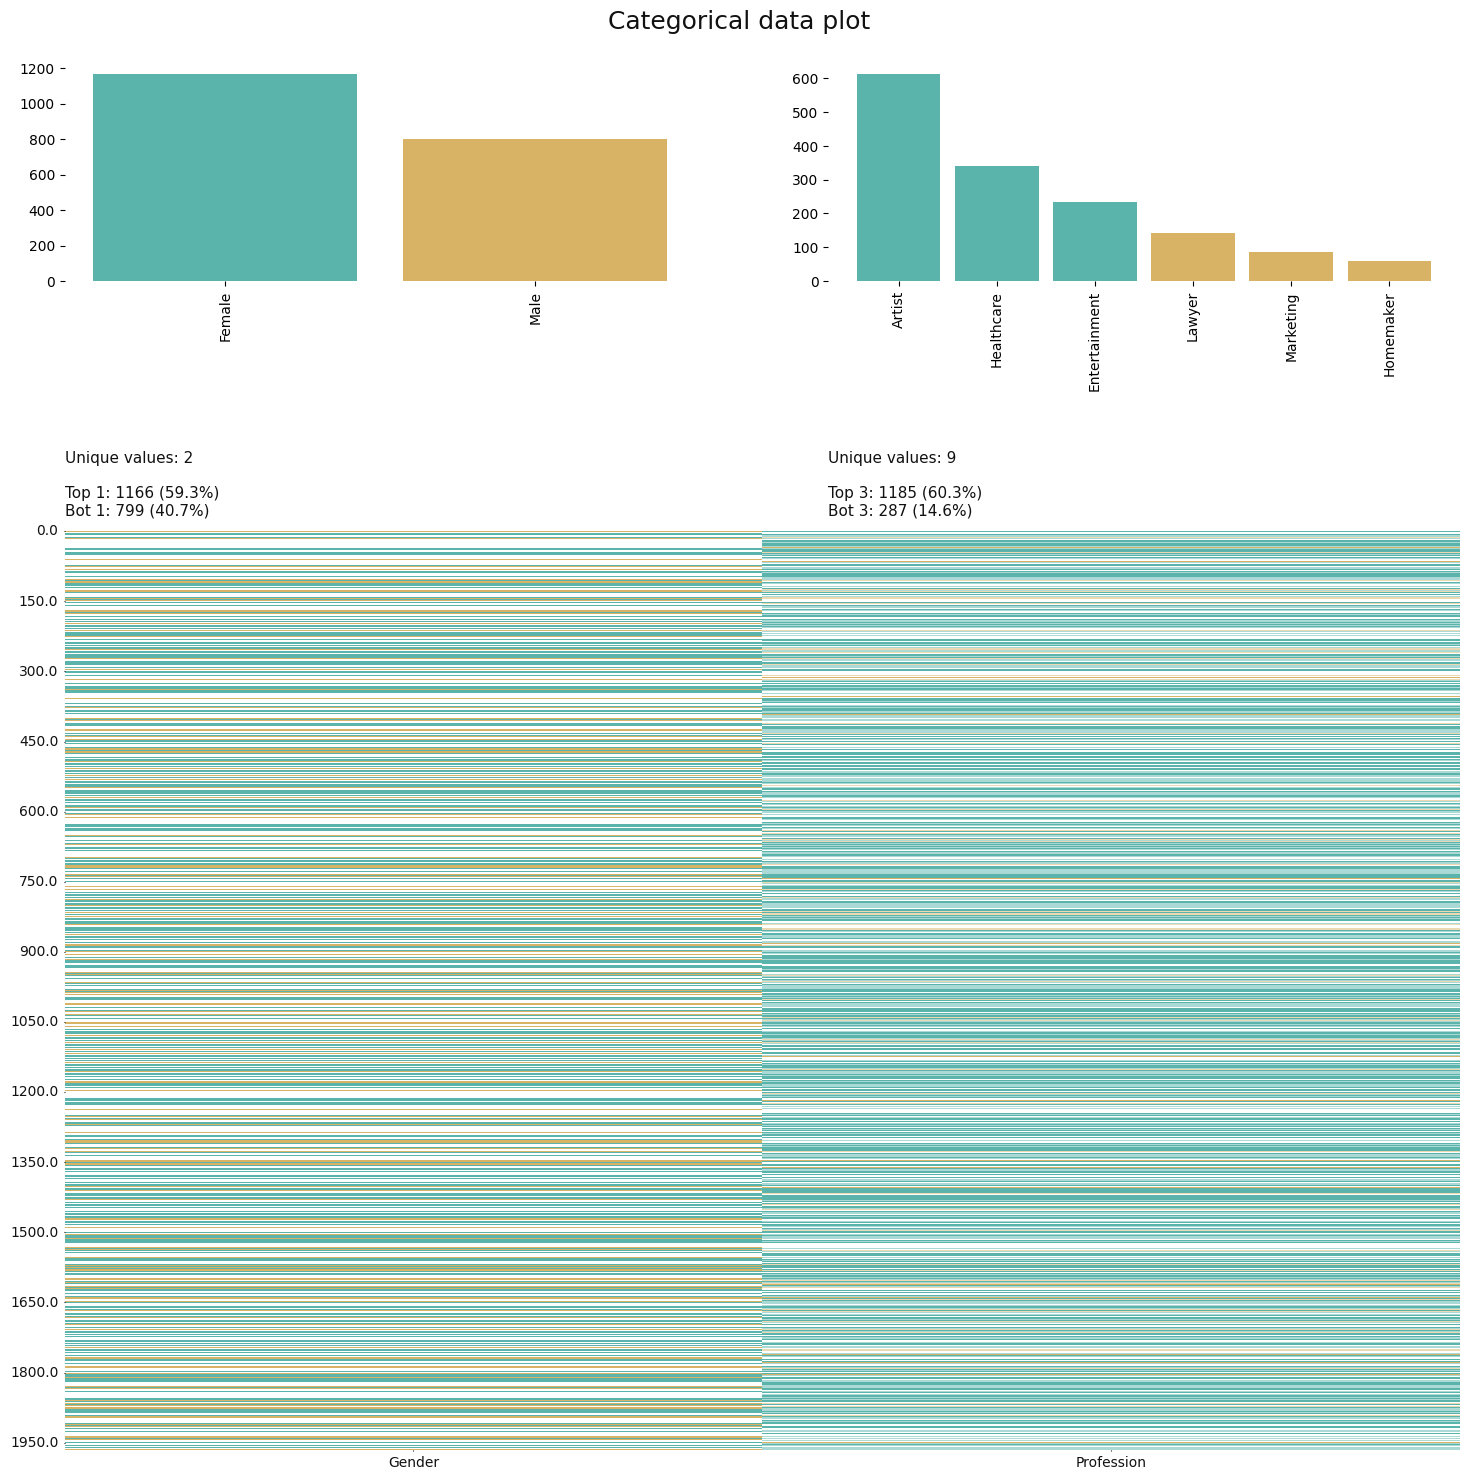

In [38]:
import klib

klib.cat_plot(df_cleaned)
# klib.missingval_plot(df) -- Same as the above graph, for missing values

### Correlation Analysis 

I make sure to also convert categorical variables to numeric. It might not make sense, but for the sake of correlating all varibales... Why not? 

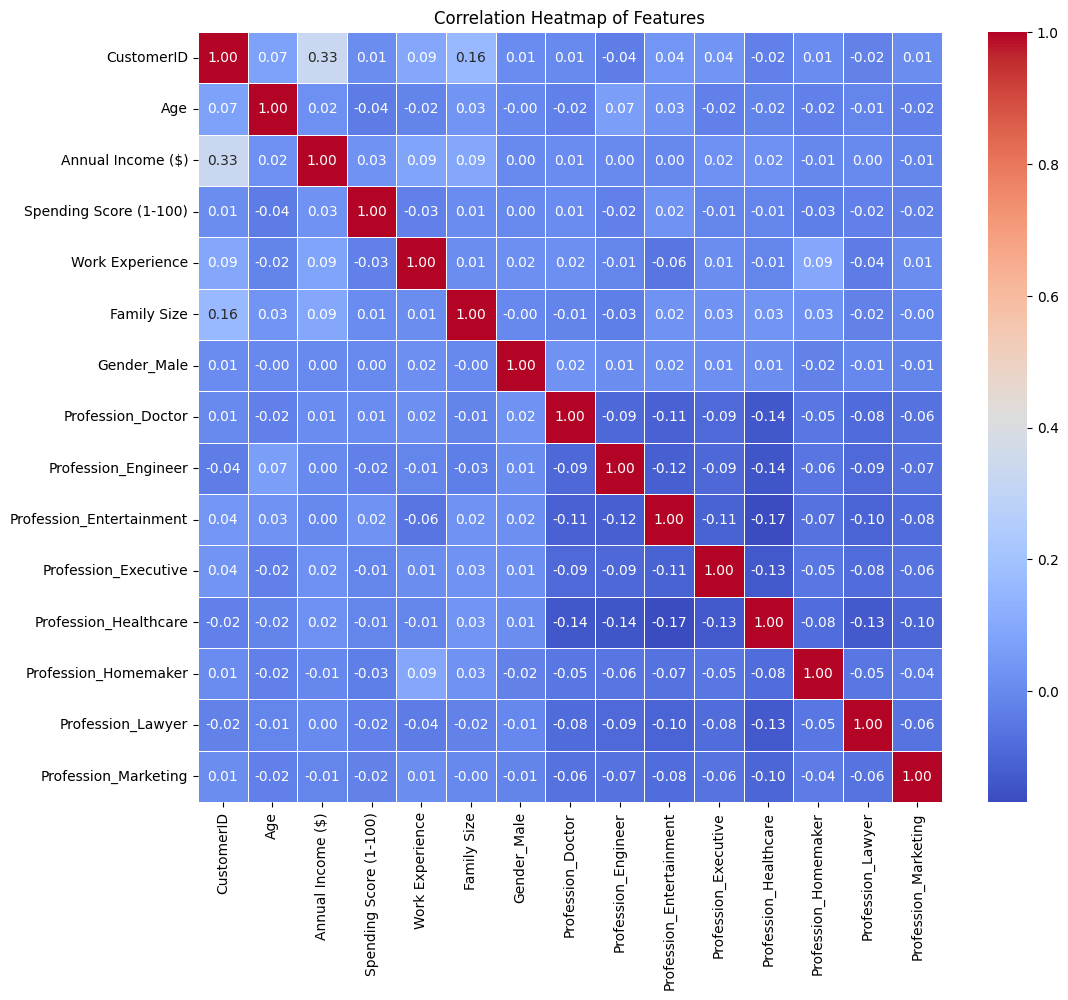

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

data_encoded = pd.get_dummies(df_cleaned, drop_first=True)

correlation_matrix = data_encoded.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and show the plot
plt.title('Correlation Heatmap of Features')
plt.show()

### Section 3: Predicting Customer Spending 

In [48]:
import pandas as pd
import statsmodels.api as sm
data_full_int = data_encoded.copy()
data_full_int[data_full_int.select_dtypes(include=['bool']).columns] = data_full_int.select_dtypes(include=['bool']).astype(int)


# Define the independent variables (with a constant term for the intercept)
X = data_full_int.drop(['CustomerID', 'Spending Score (1-100)'], axis=1)
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Define the dependent variable
Y = data_full_int['Spending Score (1-100)']

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Spending Score (1-100)   R-squared:                       0.007
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.055
Date:                    Wed, 07 Aug 2024   Prob (F-statistic):              0.395
Time:                            19:41:12   Log-Likelihood:                -9327.0
No. Observations:                    1965   AIC:                         1.868e+04
Df Residuals:                        1951   BIC:                         1.876e+04
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------